<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/AI%20study/ODE/ErrorCorr_f(xy)_21_07_25_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

In [5]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.1      # 최소 cost 
step_number = 30000   # step 횟수

def f(x, y):          # f(x, y)
  return y

def Error_Corr(x_max = 1, w_number = 6, cost_limt = 0.1, step_number = 30000):
  import autograd.numpy as np
  from autograd import grad 
  import autograd.numpy.random as npr
  from autograd.core import primitive
  from matplotlib import pyplot as plt
  %matplotlib inline
  import tensorflow.compat.v1 as tf
  tf.disable_v2_behavior()

  def sigmoid(x):
      return 1 / (1 + tf.math.exp(-x))

  def sigmoid_grad(x):
      return sigmoid(x) * (1 - sigmoid(x))

  def neural_network(W, x):
      a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
      return tf.tensordot(a1, W[1], axes = 1)

  def d_neural_network_dx(W, x, k=1):
      return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

  x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  ye = (x**(w_number + 1)) * neural_network(W, x)
  yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - f(x, y)))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  count = 0
  cost_val = 1
  while cost_val > cost_limt:
    x_space = []
    y_space = []
    ye_space = []
    corr_space = []
    cost_space = []

    if count % 1 == 0:
      print("count: ", count)
    for step in range(step_number + 1):
      for i in range(1, w_number + 1):
          globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
      cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, f(x, y), x, train])
      if count % 1 == 0:
        if step % int(step_number / 2) == 0:
            print('step: ', step, ", Cost: ", cost_val, "\n")
    if count % 1 == 0:
      print("\n")

    count += 1

    x_space += list(x_val)
    corr_space += list(ye_val + y_val)
    y_space += list(y_val)
    ye_space += list(ye_val)

    plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
    plt.plot(x_space, y_space, '.', label = 'f(x,y)')
    plt.plot(x_space, ye_space, '.', label = 'ye')
    plt.plot(x_space, np.exp(x_space), '.', label = 'exp')
    plt.legend()
    plt.show()

  sess.close()

# x_max, w_number, cost_limit, step_number 값만 수정 하시고 실행 하면 됩니다 !

x 최대치를 높히면 높힐수록 cost가 급격하게 커져서 최소 cost 찾기가 너무 오래 걸려요 ! 

그리고 cost_limit를 적어도 0.1은 해야 그래프가 어느정도 붙어서 나옵니다 !

step_number를 낮추면 결과 그래프로 중간 중간 확인 가능합니다. 반대로 높히면 그래프 나오는 빈도수가 더 줄어 들어요 !

count:  0
step:  0 , Cost:  4126.766 

step:  1500 , Cost:  3.2439594 

step:  3000 , Cost:  2.8164759 





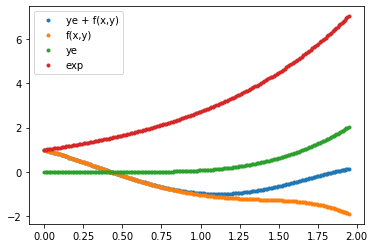

count:  1
step:  0 , Cost:  2.8162878 

step:  1500 , Cost:  2.6107414 

step:  3000 , Cost:  2.493689 





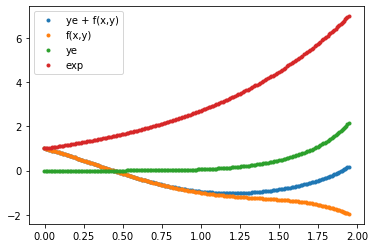

count:  2
step:  0 , Cost:  2.4936268 

step:  1500 , Cost:  2.415029 

step:  3000 , Cost:  2.3541949 





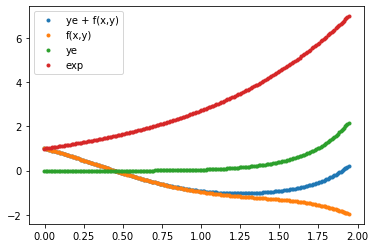

count:  3
step:  0 , Cost:  2.3541582 

step:  1500 , Cost:  2.3021617 

step:  3000 , Cost:  2.2549624 





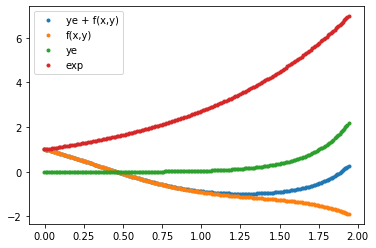

count:  4
step:  0 , Cost:  2.2549322 

step:  1500 , Cost:  2.2105224 

step:  3000 , Cost:  2.168067 





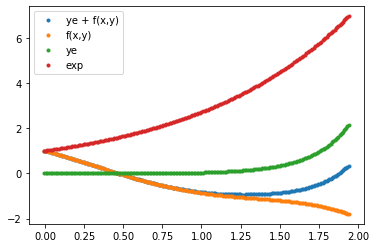

count:  5
step:  0 , Cost:  2.16804 

step:  1500 , Cost:  2.1270342 

step:  3000 , Cost:  2.087223 





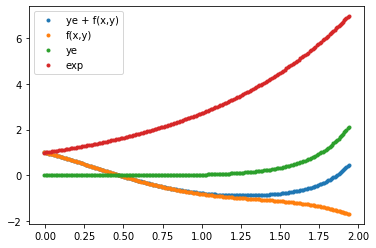

count:  6
step:  0 , Cost:  2.0871968 

step:  1500 , Cost:  2.0485382 

step:  3000 , Cost:  2.0107946 





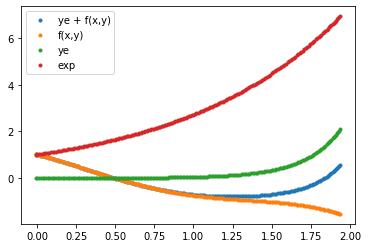

count:  7
step:  0 , Cost:  2.01077 

step:  1500 , Cost:  1.973922 

step:  3000 , Cost:  1.9378865 





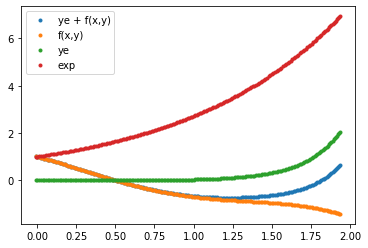

count:  8
step:  0 , Cost:  1.9378629 

step:  1500 , Cost:  1.9026995 

step:  3000 , Cost:  1.8682883 





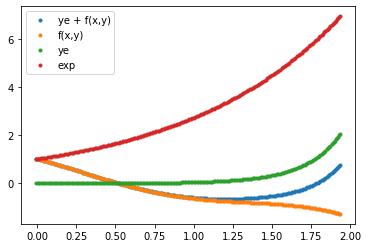

count:  9
step:  0 , Cost:  1.8682654 

step:  1500 , Cost:  1.834625 

step:  3000 , Cost:  1.80177 





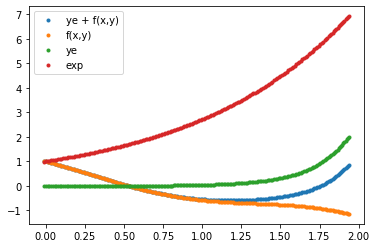

count:  10
step:  0 , Cost:  1.8017485 

step:  1500 , Cost:  1.7695937 

step:  3000 , Cost:  1.738125 





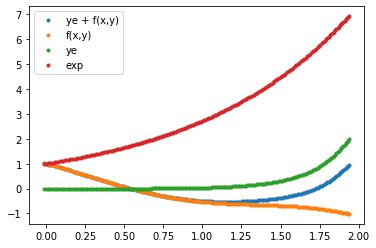

count:  11
step:  0 , Cost:  1.7381041 

step:  1500 , Cost:  1.707341 

step:  3000 , Cost:  1.6772602 





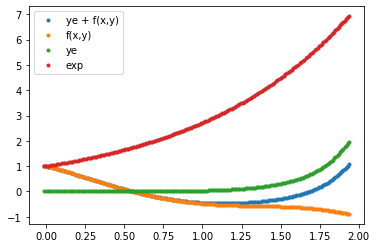

count:  12
step:  0 , Cost:  1.6772406 

step:  1500 , Cost:  1.6477815 

step:  3000 , Cost:  1.6189892 





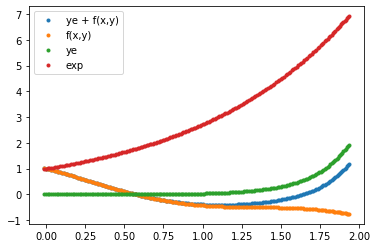

count:  13
step:  0 , Cost:  1.6189705 

step:  1500 , Cost:  1.5907993 

step:  3000 , Cost:  1.5631884 





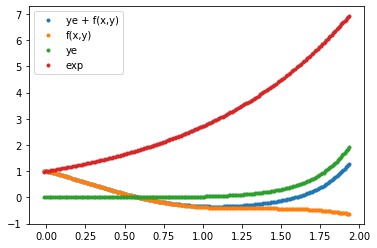

count:  14
step:  0 , Cost:  1.5631698 

step:  1500 , Cost:  1.5361708 

step:  3000 , Cost:  1.5097921 





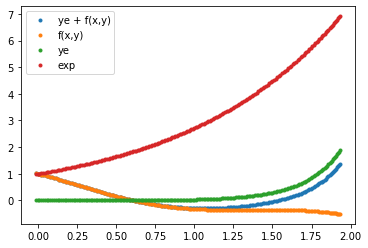

count:  15
step:  0 , Cost:  1.5097748 

step:  1500 , Cost:  1.4839233 

step:  3000 , Cost:  1.4586521 





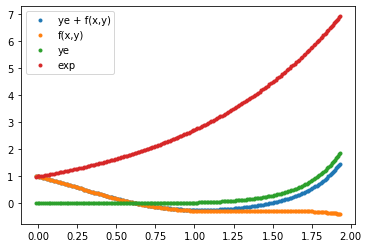

count:  16
step:  0 , Cost:  1.4586354 

step:  1500 , Cost:  1.4338768 

step:  3000 , Cost:  1.4096218 





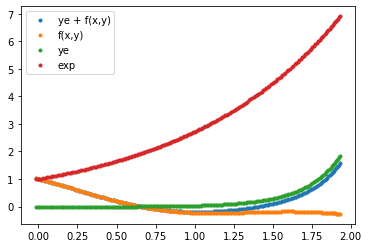

count:  17
step:  0 , Cost:  1.4096059 

step:  1500 , Cost:  1.3859104 

step:  3000 , Cost:  1.3626982 





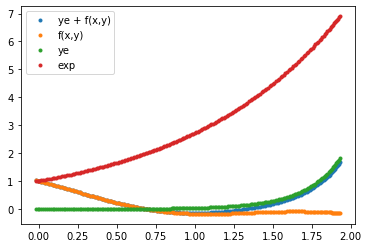

count:  18
step:  0 , Cost:  1.3626823 

step:  1500 , Cost:  1.3399398 

step:  3000 , Cost:  1.317707 





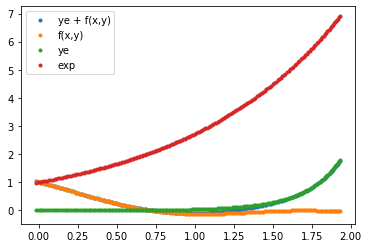

count:  19
step:  0 , Cost:  1.317692 

step:  1500 , Cost:  1.2959156 

step:  3000 , Cost:  1.2745986 





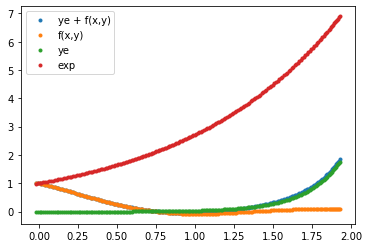

count:  20
step:  0 , Cost:  1.2745843 

step:  1500 , Cost:  1.2536807 

step:  3000 , Cost:  1.2332757 





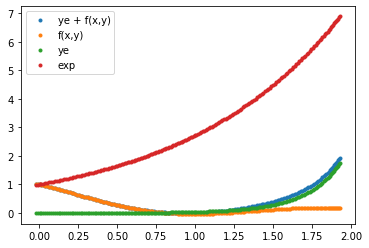

count:  21
step:  0 , Cost:  1.2332621 

step:  1500 , Cost:  1.2132479 

step:  3000 , Cost:  1.1936152 





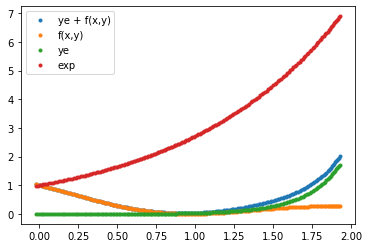

count:  22
step:  0 , Cost:  1.1936028 

step:  1500 , Cost:  1.1744505 

step:  3000 , Cost:  1.1556311 





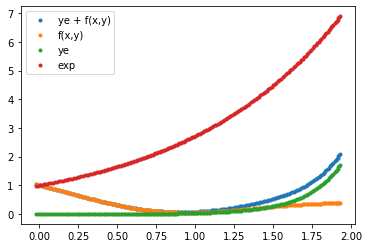

count:  23
step:  0 , Cost:  1.1556184 

step:  1500 , Cost:  1.137209 

step:  3000 , Cost:  1.1191751 





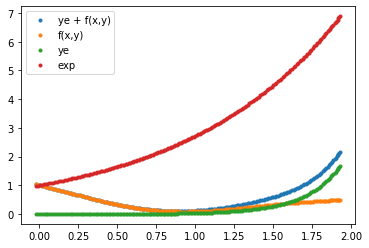

count:  24
step:  0 , Cost:  1.1191636 

step:  1500 , Cost:  1.1015165 

step:  3000 , Cost:  1.0842129 





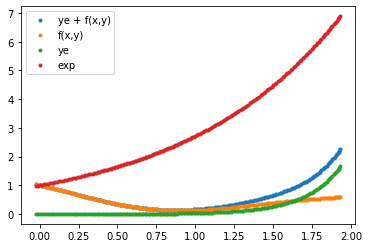

count:  25
step:  0 , Cost:  1.0842011 

step:  1500 , Cost:  1.0672727 

step:  3000 , Cost:  1.0506493 





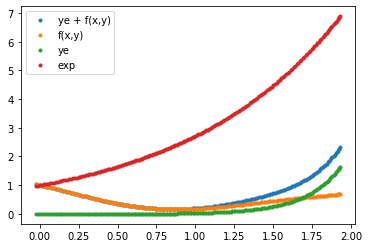

count:  26
step:  0 , Cost:  1.0506383 

step:  1500 , Cost:  1.0344179 

step:  3000 , Cost:  1.0184746 





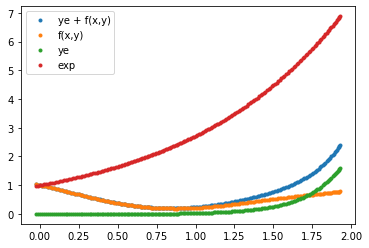

count:  27
step:  0 , Cost:  1.0184641 

step:  1500 , Cost:  1.0028467 

step:  3000 , Cost:  0.98757845 





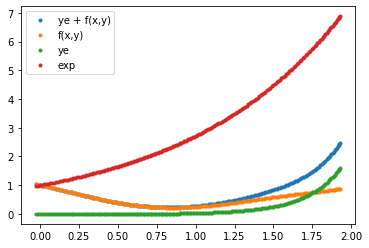

count:  28
step:  0 , Cost:  0.987568 

step:  1500 , Cost:  0.9725767 

step:  3000 , Cost:  0.9579175 





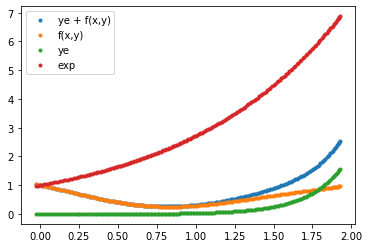

count:  29
step:  0 , Cost:  0.95790833 

step:  1500 , Cost:  0.94350123 

step:  3000 , Cost:  0.92942816 





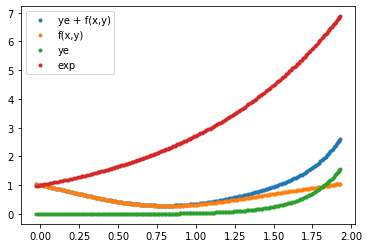

count:  30
step:  0 , Cost:  0.92941904 

step:  1500 , Cost:  0.9156109 

step:  3000 , Cost:  0.90206075 





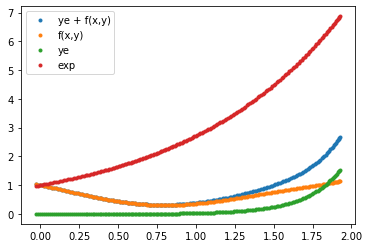

count:  31
step:  0 , Cost:  0.9020517 

step:  1500 , Cost:  0.8887893 

step:  3000 , Cost:  0.8757875 





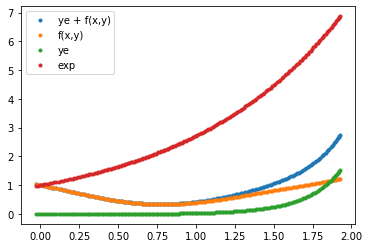

In [ ]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.9      # 최소 cost 
step_number = 3000    # step 횟수 -> 총 step 횟수 = count * step

def f(x, y):          # f(x, y)
  return y

Error_Corr(x_max, w_number, cost_limit, step_number)

count:  0
step:  0 , Cost:  5.222312 

step:  25000 , Cost:  0.33071548 

step:  50000 , Cost:  0.21876593 





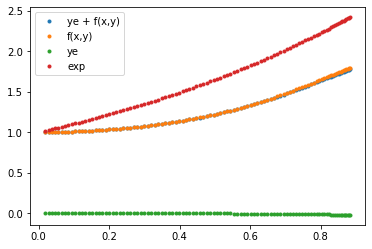

count:  1
step:  0 , Cost:  0.21876284 

step:  25000 , Cost:  0.15674181 

step:  50000 , Cost:  0.11582634 





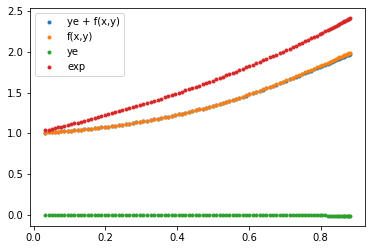

count:  2
step:  0 , Cost:  0.11582499 

step:  25000 , Cost:  0.08825396 

step:  50000 , Cost:  0.06932154 





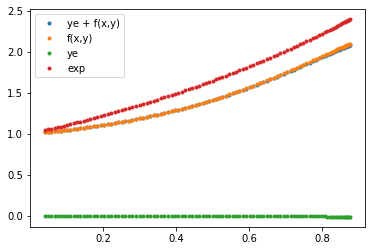

count:  3
step:  0 , Cost:  0.06932092 

step:  25000 , Cost:  0.055991214 

step:  50000 , Cost:  0.046378937 





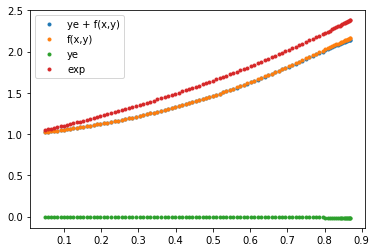

count:  4
step:  0 , Cost:  0.046378624 

step:  25000 , Cost:  0.03922506 

step:  50000 , Cost:  0.033803735 





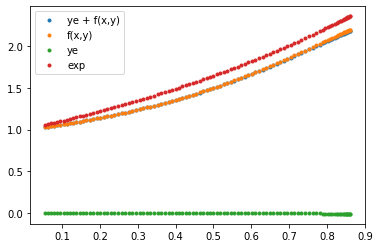

count:  5
step:  0 , Cost:  0.03380353 

step:  25000 , Cost:  0.029585965 

step:  50000 , Cost:  0.026210172 





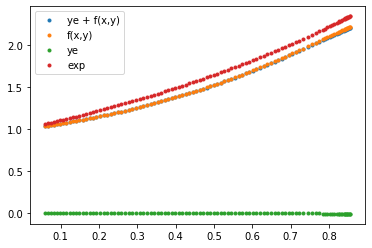

count:  6
step:  0 , Cost:  0.026210047 

step:  25000 , Cost:  0.023461362 

step:  50000 , Cost:  0.0211577 





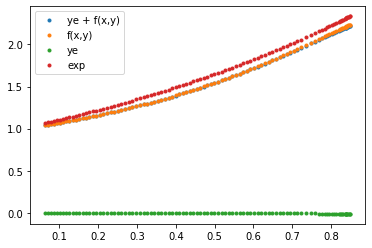

count:  7
step:  0 , Cost:  0.021157626 

step:  25000 , Cost:  0.019223334 

step:  50000 , Cost:  0.017579935 





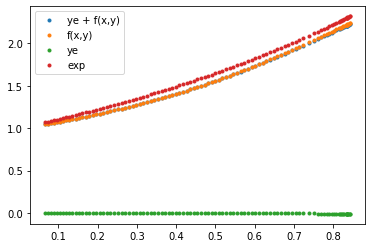

count:  8
step:  0 , Cost:  0.017579881 

step:  25000 , Cost:  0.016162552 

step:  50000 , Cost:  0.014912186 





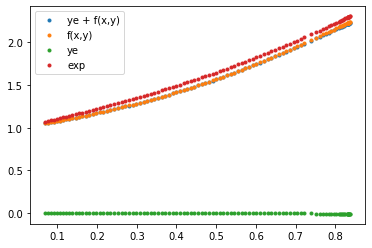

count:  9
step:  0 , Cost:  0.014912144 

step:  25000 , Cost:  0.013860778 

step:  50000 , Cost:  0.012955375 





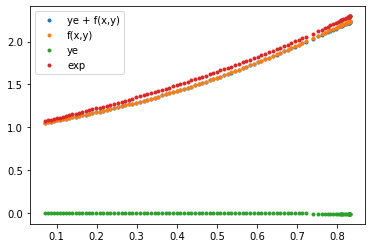

count:  10
step:  0 , Cost:  0.0129553415 

step:  25000 , Cost:  0.012121308 

step:  50000 , Cost:  0.011379011 





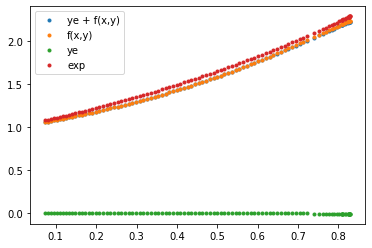

count:  11
step:  0 , Cost:  0.011378991 

step:  25000 , Cost:  0.01067598 

step:  50000 , Cost:  0.010038785 





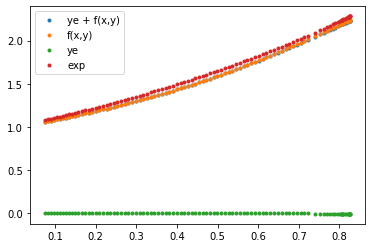

count:  12
step:  0 , Cost:  0.010038759 

step:  25000 , Cost:  0.009464354 

step:  50000 , Cost:  0.008915728 





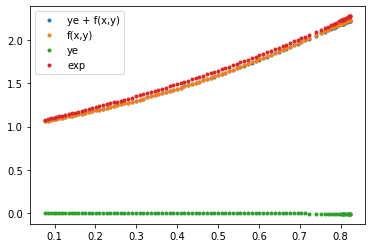

In [ ]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.01      # 최소 cost 
step_number = 50000    # step 횟수 -> 총 step 횟수 = count * step

def f(x, y):          # f(x, y)
  return y

Error_Corr(x_max, w_number, cost_limit, step_number)